## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [2]:
import matplotlib.pyplot as plt
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']

def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

## Importing the Data

In [3]:
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## To Check the Missing Data

In [4]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

## Data Normalization

In [5]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


## Converting Label Value

In [6]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

## Selecting Features

In [7]:
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


## Selecting Labels

In [8]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

## Train and Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05, shuffle = True, random_state=0)

## Creating the Model

In [13]:
def get_model():
    
    model = Sequential([Dense(10, input_shape = (6,), activation = 'relu'),Dense(20, activation = 'relu'), Dense(5, activation = 'relu'),Dense(1)])
    model.compile(loss='mse',optimizer='adadelta')
    return model

model = get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)
model = get_model()
preds_on_untrained = model.predict(X_test)
history = model.fit(X_train, y_train,validation_data = (X_test, y_test),epochs = 1000,callbacks = [early_stopping])

Epoch 1/1000
149/149 [==============================] - 0s 2ms/step - loss: 1.1194 - val_loss: 0.9804
Epoch 2/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1182 - val_loss: 0.9794
Epoch 3/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1171 - val_loss: 0.9785
Epoch 4/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1160 - val_loss: 0.9776
Epoch 5/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1150 - val_loss: 0.9767
Epoch 6/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1139 - val_loss: 0.9758
Epoch 7/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1129 - val_loss: 0.9749
Epoch 8/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1119 - val_loss: 0.9740
Epoch 9/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.1109 - val_loss: 0.9732
Epoch 10/1000
149/149 [==============================] - 0s 1ms/step - loss: 1.110

## Ploting Training and Validation Loss

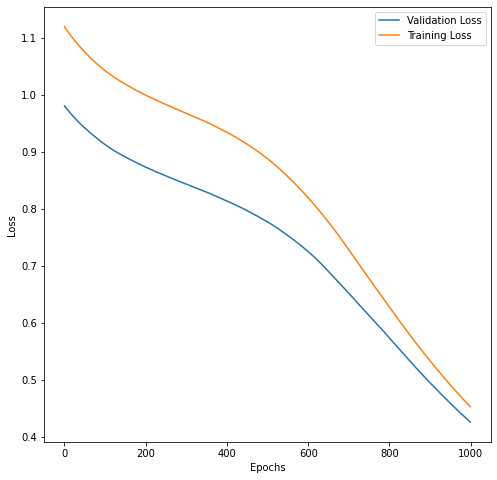

In [15]:
plot_loss(history)

## Plotting Raw Predictions

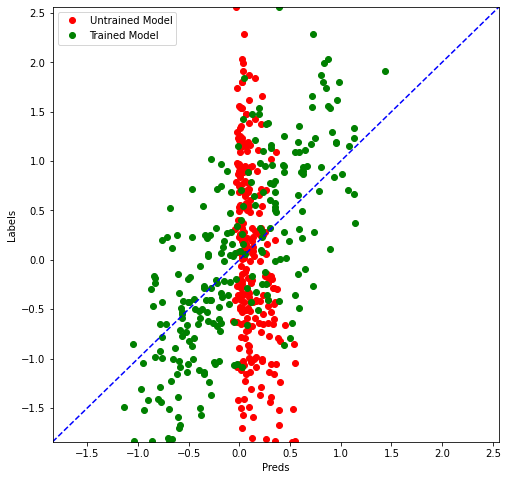

In [16]:
preds_on_trained = model.predict(X_test)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## Plotting Price Predictions

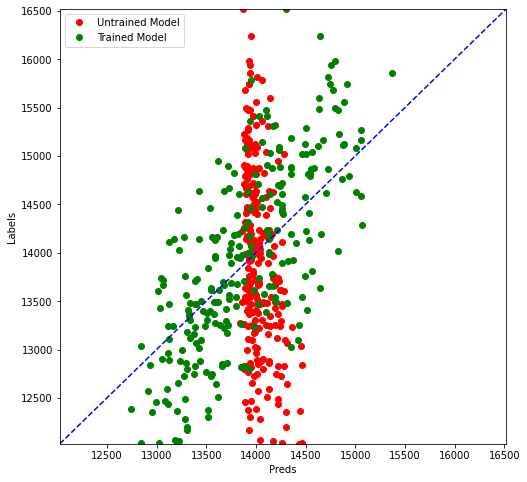

In [17]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]
compare_predictions(price_on_untrained, price_on_trained, price_y_test)